In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv("../data/train_fe.csv")
test = pd.read_csv("../data/test_fe.csv")

In [3]:
train.head()

,pregnancy_occurence,glucose_concentration,blood_pressure,triceps_foldness,serum_insulin,bmi,predigree_function,age,target
0,0.117647,0.422111,0.000000,0.000000,0.000000,0.000000,0.096499,0.000000,0.0
1,0.529412,0.562814,0.672131,0.380952,0.000000,0.420268,0.514091,0.483333,1.0
2,0.058824,0.698492,0.377049,0.301587,0.098109,0.427720,0.245944,0.016667,0.0
3,0.000000,0.809045,0.409836,0.000000,0.000000,0.326379,0.075149,0.733333,0.0
4,0.352941,0.673367,0.655738,0.587302,0.437352,0.688525,0.068318,0.416667,1.0


In [4]:
test.head()

,pregnancy_occurence,glucose_concentration,blood_pressure,triceps_foldness,serum_insulin,bmi,predigree_function,age,target
0,0.352941,0.492462,0.475410,0.523810,0.224586,0.506706,0.150299,0.366667,0.0
1,0.117647,0.562814,0.614754,0.507937,0.000000,0.532042,0.029889,0.000000,0.0
2,0.117647,0.542714,0.524590,0.000000,0.000000,0.459016,0.034159,0.000000,0.0
3,0.470588,0.537688,0.655738,0.000000,0.000000,0.366617,0.332195,0.216667,0.0
4,0.411765,0.683417,0.737705,0.000000,0.000000,0.445604,0.056362,0.483333,0.0


In [5]:
x_train_use, y_train_use= train.drop('target', axis=1), train['target']

In [6]:
x_train,x_val, y_train, y_val=train_test_split(x_train_use, y_train_use, train_size=0.8, random_state=42)

In [7]:
x_train.shape

(491, 8)

### Decision Tree Classifier

#### Max Depth 3

In [13]:
param_grid = {
    'max_depth': list(range(3, 7)),  
    'max_features': list(range(3, 9))  
}


In [14]:
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5)


In [15]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'max_features': [3, 4, 5, 6, 7, 8]})

In [16]:
best_param=grid_search.best_params_
best_model=grid_search.best_estimator_

In [17]:
best_param

{'max_depth': 4, 'max_features': 7}

In [18]:
best_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=7, random_state=42)

In [19]:
y_pred=best_model.predict(x_train)

In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87       320
         1.0       0.75      0.79      0.77       171

    accuracy                           0.83       491
   macro avg       0.81      0.82      0.82       491
weighted avg       0.84      0.83      0.83       491



In [21]:
def plot_confusion_matrix(title,conf_matrix):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(title)
    plt.show()
    plt.savefig("../conf/"+title+".png")

In [22]:
conf=confusion_matrix(y_train, y_pred)

<AxesSubplot:>

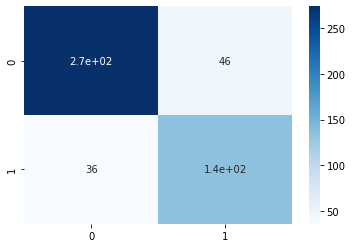

In [23]:
#plot_confusion_matrix("Decision_Tree_Classfier_Train",conf)
sns.heatmap(conf, annot=True, cmap= "Blues")

In [24]:
y_pred_val=best_model.predict(x_val)

In [25]:
print(classification_report(y_val, y_pred_val))

              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80        81
         1.0       0.62      0.62      0.62        42

    accuracy                           0.74       123
   macro avg       0.71      0.71      0.71       123
weighted avg       0.74      0.74      0.74       123



In [26]:
conf_val=confusion_matrix(y_val, y_pred_val)

<AxesSubplot:>

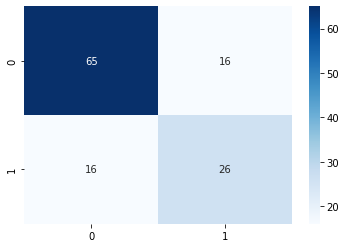

In [27]:
#plot_confusion_matrix("Decision_Tree_Classfier_Validate",conf_val)
sns.heatmap(conf_val, annot=True, cmap= "Blues")

### Extract Result

In [28]:
import time

start=time.time()

best_model.fit(x_train_use, y_train_use)

elapse=time.time()-start

In [29]:
pred_use= best_model.predict(x_train_use)

In [30]:
cross_val_score(best_model, x_train_use, y_train_use, scoring='f1')

array([0.58823529, 0.70707071, 0.69811321, 0.59090909, 0.66666667])

In [31]:
print(classification_report(y_train_use, pred_use))

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       401
         1.0       0.66      0.78      0.71       213

    accuracy                           0.78       614
   macro avg       0.76      0.78      0.77       614
weighted avg       0.80      0.78      0.79       614



In [32]:
f1_train = f1_score(y_train_use, pred_use)
prec_train = precision_score(y_train_use, pred_use)
recall_train = recall_score(y_train_use, pred_use)

In [33]:
x_test, y_test= test.drop('target', axis=1), test['target']

In [34]:
pred_test=best_model.predict(x_test)

In [35]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.82      0.70      0.75        99
         1.0       0.57      0.73      0.64        55

    accuracy                           0.71       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



In [36]:
f1_test = f1_score(y_test, pred_test)
prec_test = precision_score(y_test, pred_test)
recall_test = recall_score(y_test, pred_test)

In [37]:
conf_test=confusion_matrix(y_test, pred_test)

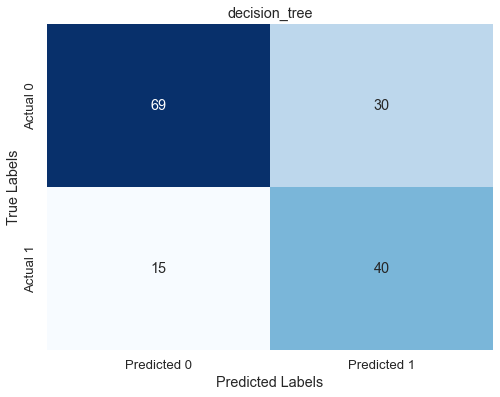

<Figure size 432x288 with 0 Axes>

In [38]:
plot_confusion_matrix("decision_tree",conf_test)

In [39]:
df=pd.DataFrame()
df["f1_test"] = [f1_test]
df["f1_train"] = f1_train
df["prec_train"] = prec_train
df["prec_test"] = prec_test
df["recall_train"] = recall_train
df["recall_test"] = recall_test
df["model"] = "Decision Tree"
df["elapsed"] = elapse

In [40]:
df.head()

,f1_test,f1_train,prec_train,prec_test,recall_train,recall_test,model,elapsed
0,0.64,0.713978,0.65873,0.571429,0.779343,0.727273,Decision Tree,0.009177


In [41]:
df.to_csv("../results/regular/dtc.csv", index=False)